In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [13]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype


(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [14]:
X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

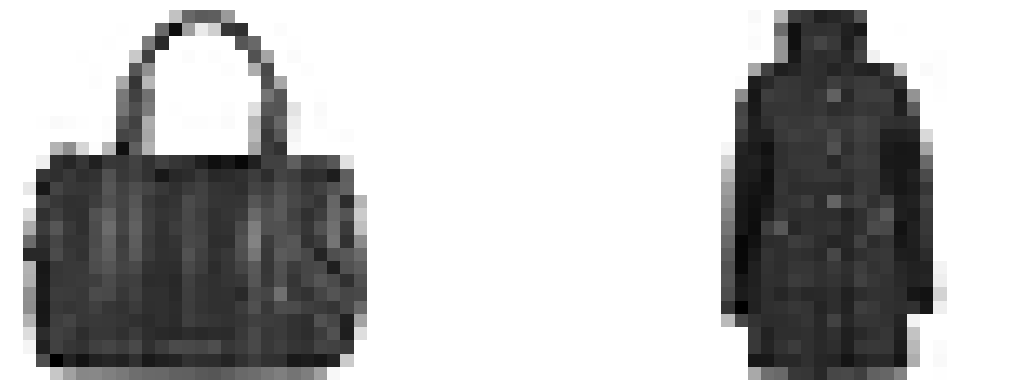

In [15]:
# looking at first two images

plt.figure(figsize = (15, 4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()


In [18]:
y_train


array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]], class_names[y_train[1]] 


('Bag', 'Coat')

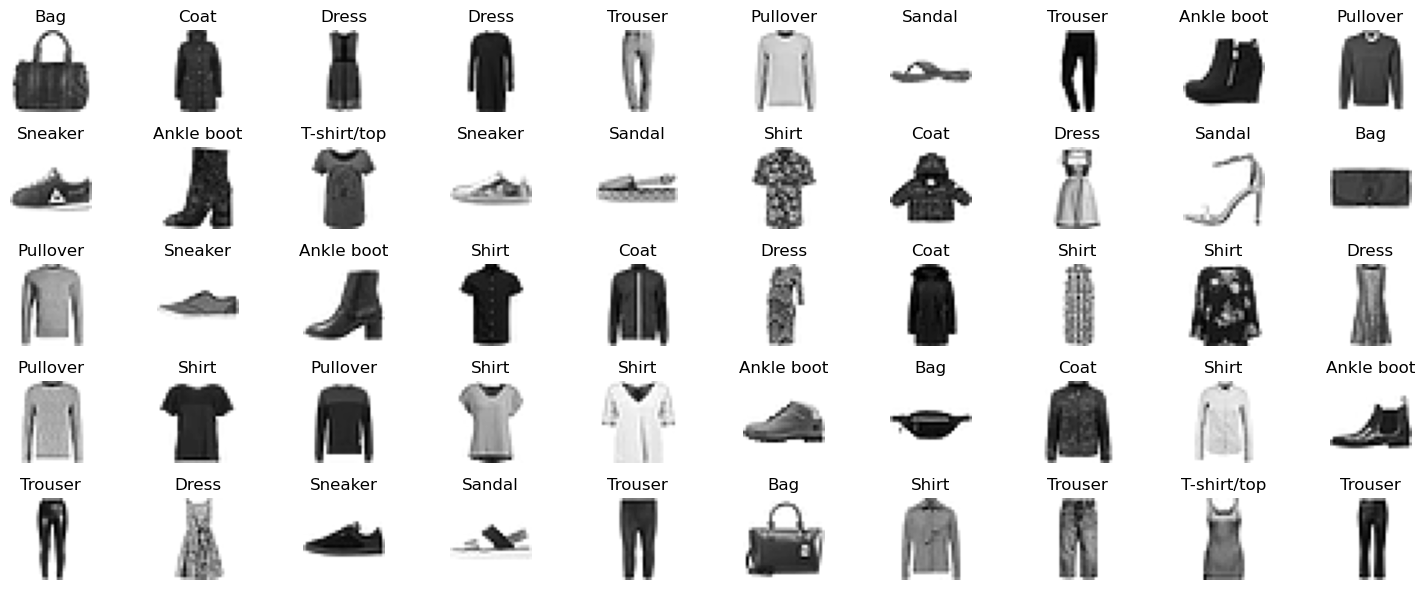

In [21]:
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()


In [23]:
# building sequential model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])


In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 70)                7070      
                                                                 
 dense_7 (Dense)             (None, 50)                3550      
                                                                 
 dense_8 (Dense)             (None, 20)                1020      
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 90,350
Trainable params: 90,350
Non-trai

In [25]:

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [26]:
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50)


Epoch 1/50
1750/1750 [==============================] - 11s 3ms/step - loss: 0.5406 - accuracy: 0.8070 - val_loss: 56.8523 - val_accuracy: 0.8328
Epoch 2/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3831 - accuracy: 0.8601 - val_loss: 59.4385 - val_accuracy: 0.8278
Epoch 3/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3473 - accuracy: 0.8725 - val_loss: 62.5832 - val_accuracy: 0.8508
Epoch 4/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.8814 - val_loss: 47.4464 - val_accuracy: 0.8600
Epoch 5/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.8880 - val_loss: 51.3646 - val_accuracy: 0.8637
Epoch 6/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.8906 - val_loss: 51.0672 - val_accuracy: 0.8535
Epoch 7/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2765 - accuracy: 0.8960 - val_loss: 55.9475 - val_a

In [27]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.8830


[0.4990687072277069, 0.8830000162124634]

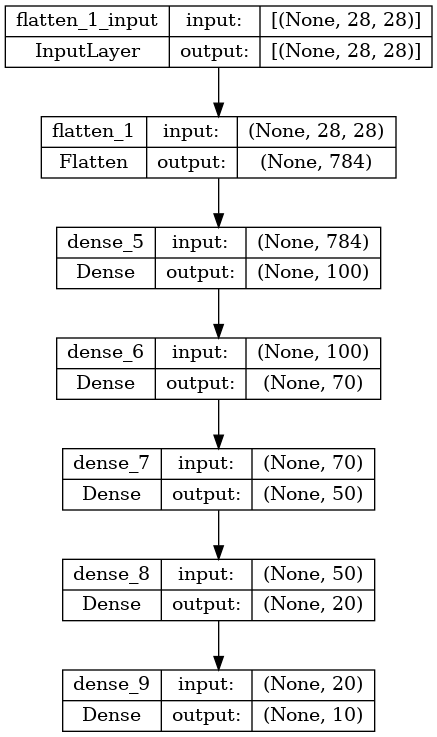

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

In [31]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 24ms/step


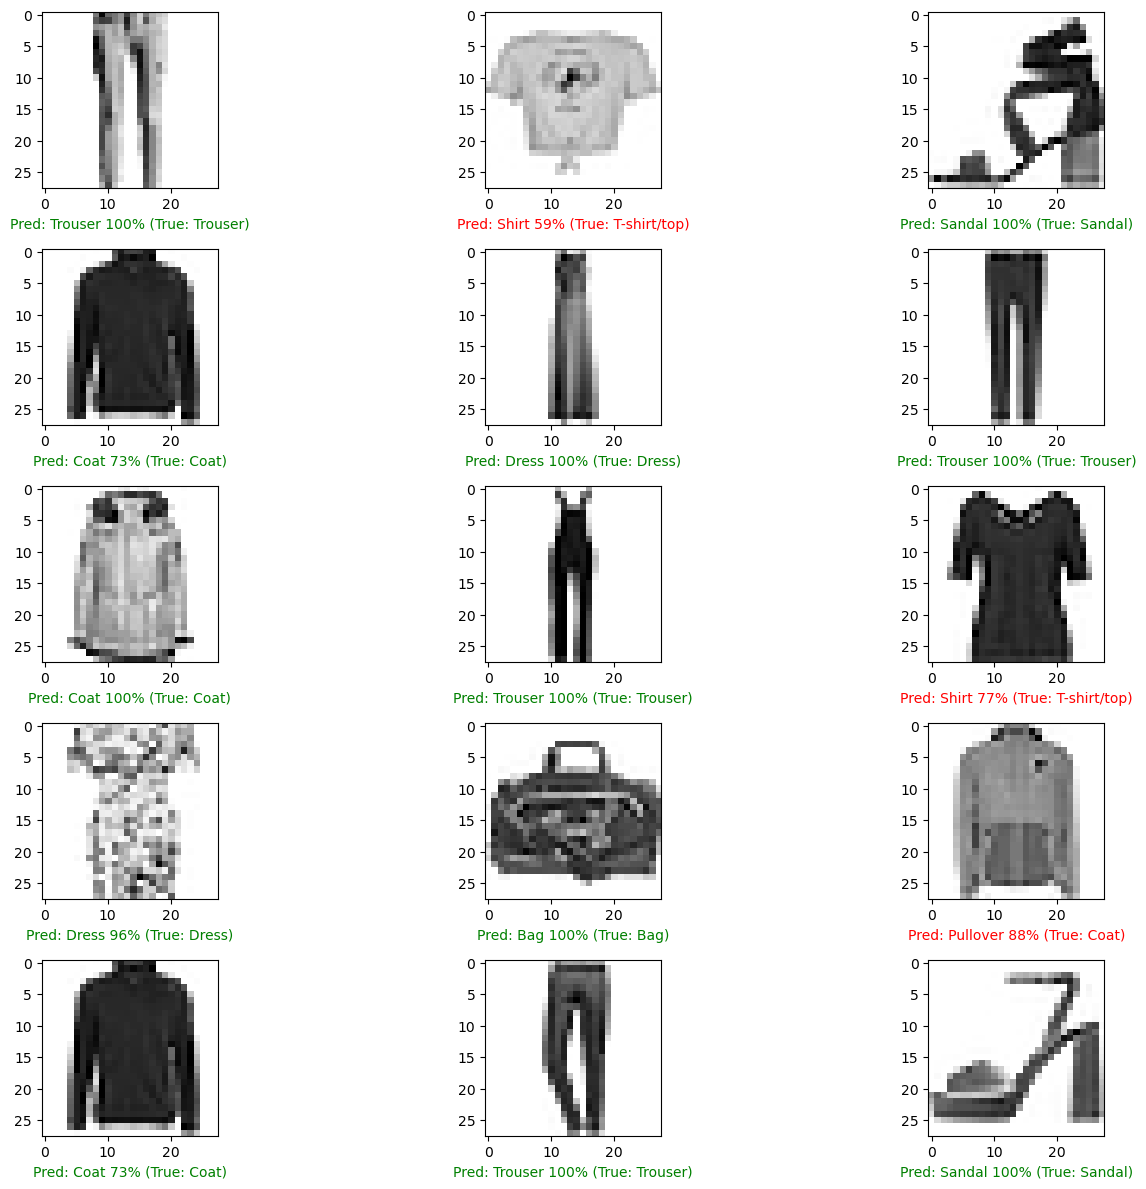

In [32]:
plt.figure(figsize = (15, 12))
plotnumber = 1

for i in range(15):
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        plot_random_image(model=model, 
                  images=X_test, 
                  true_labels=y_test, 
                  classes=class_names)
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()
